# **DATA SOURCE**

---



In [114]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
# Load the dataset
# Read the uploaded CSV file
df = pd.read_csv('Superstore.csv', encoding='ISO-8859-1')

In [118]:
# Preview data
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [119]:
# Check information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

# **DATA CLEANING**

---



In [121]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [122]:
# Fill missing values with 0
df.fillna(0, inplace=True)

In [123]:
# Check for missing values
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


# **DATA PROCESSING & DATA VISUALIZATION**

---



In [124]:
# Convert 'Order Date' and 'Ship Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

# Check the updated data types to ensure conversion
df[['Order Date', 'Ship Date']].dtypes

,0
Order Date,datetime64[ns]
Ship Date,datetime64[ns]


In [125]:
df['Order Date'].agg(['min','max'])

,Order Date
min,2014-01-03
max,2017-12-30


In [126]:
df['Ship Date'].agg(['min','max'])

,Ship Date
min,2014-01-07
max,2018-01-05


In [127]:
# Extract the'Order Date' column
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day

## **Sales Trend**

In [128]:
# Group data by 'Year' to calculate total Sales per year
sales_by_year = df.groupby('Year')['Sales'].count().reset_index()
sales_by_year

,Year,Sales
0,2014,1993
1,2015,2102
2,2016,2587
3,2017,3312


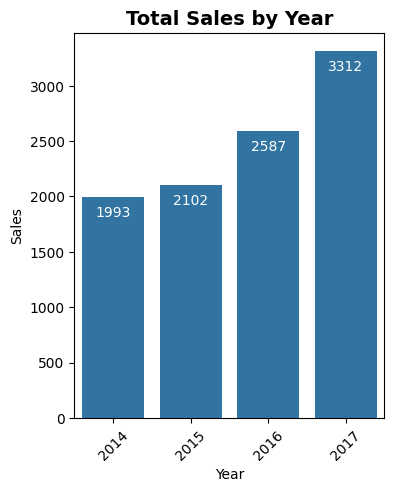

In [129]:
# Plot Sales by Year
plt.figure(figsize=(4, 5))
sns.barplot(data=sales_by_year,
            x='Year',
            y='Sales',
            errorbar=None)

# Add title and labels
plt.title('Total Sales by Year', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=10)
plt.ylabel('Sales', fontsize=10)
plt.xticks(rotation=45)

# Add the values on top of each bar
for index, row in sales_by_year.iterrows():
    plt.text(index, row['Sales'] - 200, round(row['Sales'], 2), color='white', ha="center", va="bottom")

# Display the plot
plt.show()

In [130]:
# Group data by 'Year' to calculate total Sales per year
sales_by_month = df.groupby('Month')['Sales'].count().reset_index()
sales_by_month

,Month,Sales
0,1,381
1,2,300
2,3,696
3,4,668
4,5,735
5,6,717
6,7,710
7,8,706
8,9,1383
9,10,819


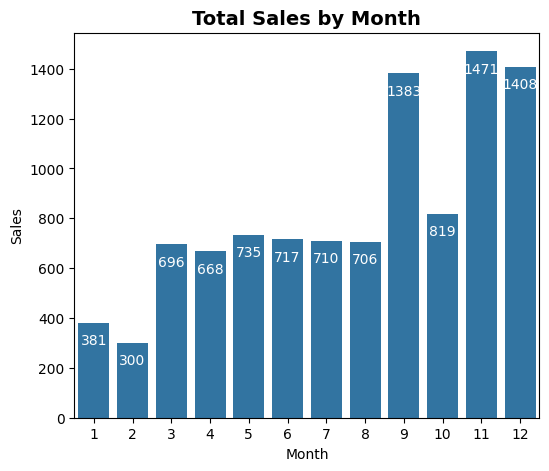

In [131]:
# Plot Sales by Month
plt.figure(figsize=(6,5))
sns.barplot(data=sales_by_month,
            x='Month',
            y='Sales',
            errorbar=None)

# Add title and labels
plt.title('Total Sales by Month', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=10)
plt.ylabel('Sales', fontsize=10)
plt.xticks(rotation=0)

# Add the values on top of each bar
for index, row in sales_by_month.iterrows():
    plt.text(index, row['Sales'] - 100, round(row['Sales'], 2), color='white', ha="center", va="bottom")

# Display the plot
plt.show()

In [132]:
# Extract day names from 'Order Date'
df['Order_day_name'] = df['Order Date'].dt.day_name()


In [133]:
# Group by 'Order_day_name' and sum the 'Sales'
sales_by_day = df.groupby('Order_day_name')['Sales'].count().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sales_by_day

,Sales
Order_day_name,
Monday,1871
Tuesday,1106
Wednesday,371
Thursday,1463
Friday,1818
Saturday,1655
Sunday,1710


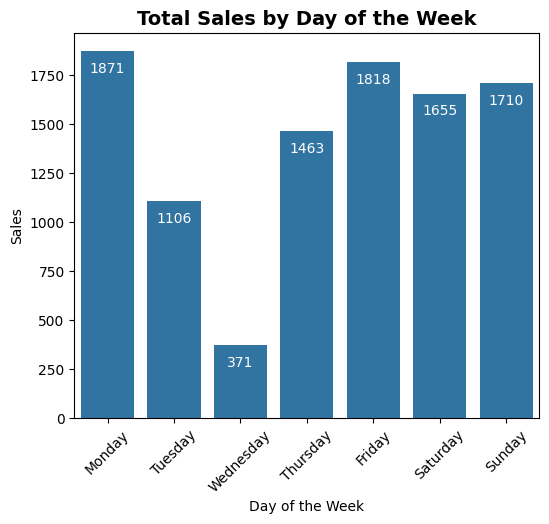

In [134]:
# Plot Total Sales by Day of the Week
plt.figure(figsize=(6, 5))
sns.barplot(x=sales_by_day.index,
            y=sales_by_day.values,
            errorbar=None)

# Add title and labels
plt.title('Total Sales by Day of the Week', fontsize=14, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=10)
plt.ylabel('Sales', fontsize=10)
plt.xticks(rotation=45)

# Add the values on top of each bar
for index, value in enumerate(sales_by_day):
    plt.text(index, value - 125, f'{int(value)}', color='white', ha="center", va="bottom")

# Display the plot
plt.show()

In [135]:
# Categorize days into 'Weekday' and 'Weekend'
df['Weektime'] = df['Order_day_name'].apply(lambda x: 'Weekday' if x in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] else 'Weekend')

# Group by 'Weektime' and sum the 'Sales'
sales_by_weektime = df.groupby('Weektime')['Sales'].count()
sales_by_weektime

,Sales
Weektime,
Weekday,6629
Weekend,3365


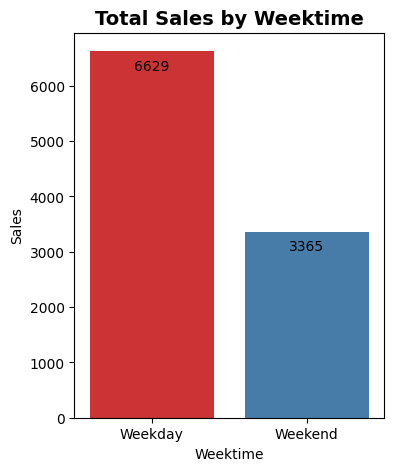

In [136]:
# Plot Total Sales by Weektime
plt.figure(figsize=(4, 5))
sns.barplot(x=sales_by_weektime.index,
            y=sales_by_weektime.values,
            hue=sales_by_weektime.index,
            errorbar=None,
            palette='Set1')

# Add title and labels with increased font sizes
plt.title('Total Sales by Weektime', fontsize=14, fontweight='bold')
plt.xlabel('Weektime', fontsize=10)
plt.ylabel('Sales', fontsize=10)

# Add the values on top of each bar
for index, row in enumerate(sales_by_weektime):
    plt.text(index, row - 400, f"{int(row)}", color='black', ha="center", va="bottom", fontsize=10)

# Display the plot
plt.show()

In [137]:
# Top 5 States by Sales
top_states_sales = df.groupby('State')['Sales'].sum().reset_index()
top_states_sales = top_states_sales.sort_values(by='Sales', ascending=False).head(5)
top_states_sales

,State,Sales
3,California,457687.6315
30,New York,310876.2710
41,Texas,170188.0458
45,Washington,138641.2700
36,Pennsylvania,116511.9140


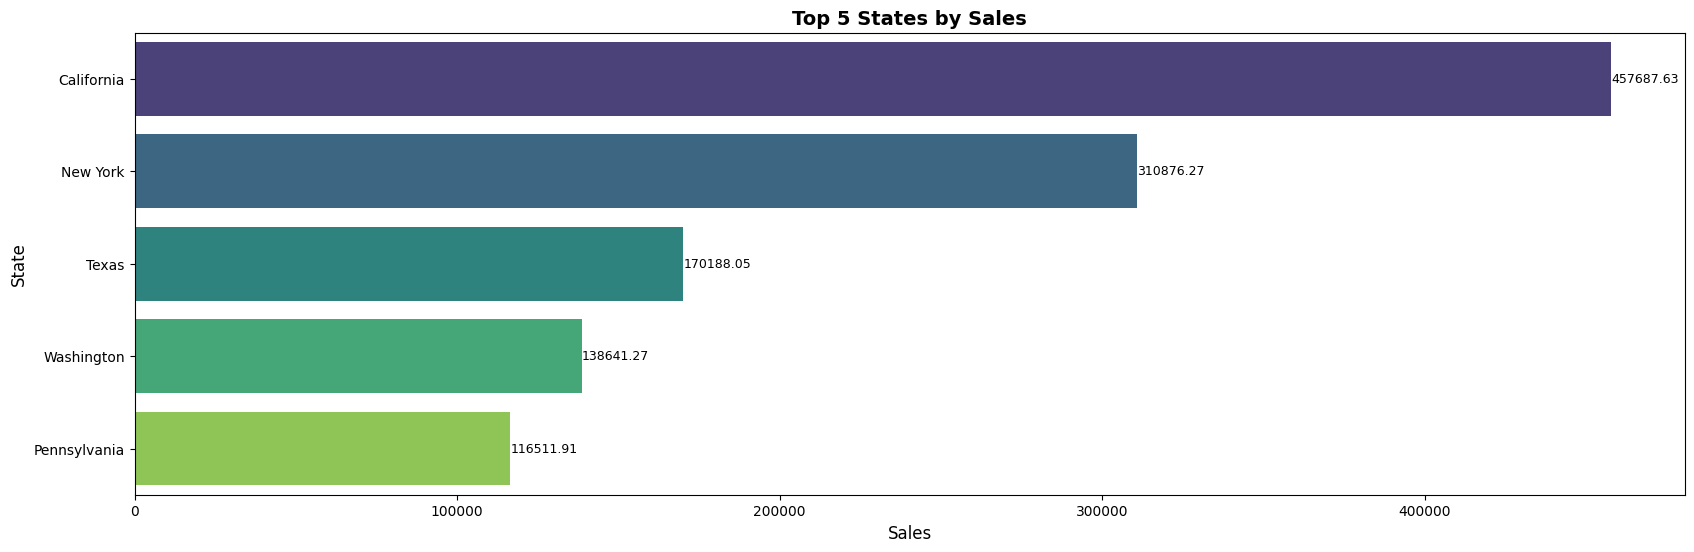

In [138]:
# Plot for Top 5 States by Sales (Vertical Bar)
plt.figure(figsize=(20, 6))
ax = sns.barplot(data=top_states_sales,
                 x='Sales',
                 y='State',
                 palette='viridis',
                 hue='State',
                 errorbar=None)

# Title and labels
plt.title('Top 5 States by Sales', fontsize=14, fontweight='bold')
plt.xlabel('Sales', fontsize=12)
plt.ylabel('State', fontsize=12)

# Add the values on top of each bar using ax.bar_label (this is better for placement)
for p in ax.patches:
    ax.text(p.get_width() + 100, p.get_y() + p.get_height() / 2,
            f'{p.get_width():.2f}', color='black', va='center', ha='left', fontsize=9)

# Display the plot
plt.show()


In [139]:
# Top 5 City by Sales
top_cities_sales = df.groupby('City')['Sales'].sum().reset_index()
top_cities_sales = top_cities_sales.sort_values(by='Sales', ascending=False).head(5)
top_cities_sales

,City,Sales
329,New York City,256368.161
266,Los Angeles,175851.341
452,Seattle,119540.742
438,San Francisco,112669.092
374,Philadelphia,109077.013


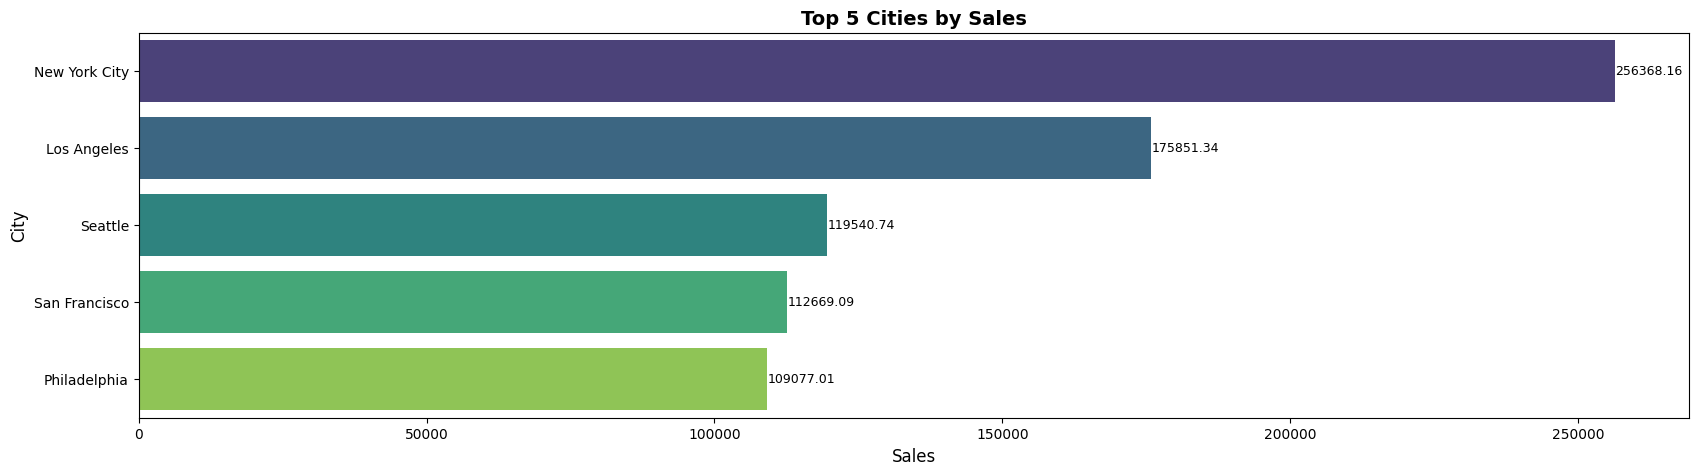

In [140]:
# Plot for Top 5 Cities by Sales (Vertical Bar)
plt.figure(figsize=(20, 5))
ax = sns.barplot(data=top_cities_sales,
            x='Sales',
            y='City',
            palette='viridis',
            hue='City',
            errorbar=None)

plt.title('Top 5 Cities by Sales', fontsize=14, fontweight='bold')
plt.xlabel('Sales', fontsize=12)
plt.ylabel('City', fontsize=12)

# Add the values on top of each bar
for p in ax.patches:
    ax.text(p.get_width() + 100, p.get_y() + p.get_height() / 2,
            f'{p.get_width():.2f}', color='black', va='center', ha='left', fontsize=9)

# Display the plot
plt.show()


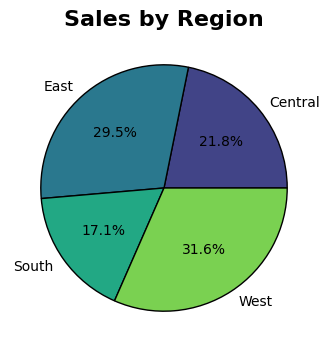

In [141]:
# Total Sales per region
sales_by_region = df.groupby('Region')['Sales'].sum().reset_index()

# Plot Sales by Region
plt.figure(figsize=(6, 4))
plt.pie(sales_by_region['Sales'],
        labels=sales_by_region['Region'],
        autopct='%1.1f%%',
        colors=sns.color_palette('viridis', len(sales_by_region)),  # Use viridis color palette
        wedgeprops={'edgecolor': 'black'})

# Add title
plt.title('Sales by Region', fontsize=16, fontweight='bold')

# Display the plot
plt.show()


## **Profit**

In [142]:
# Group by 'Category' to calculate total profit per category
total_profit_by_category = df.groupby('Category')['Profit'].sum().reset_index()
total_profit_by_category = total_profit_by_category.sort_values(by='Profit', ascending=False)
total_profit_by_category

,Category,Profit
2,Technology,145454.9481
1,Office Supplies,122490.8008
0,Furniture,18451.2728


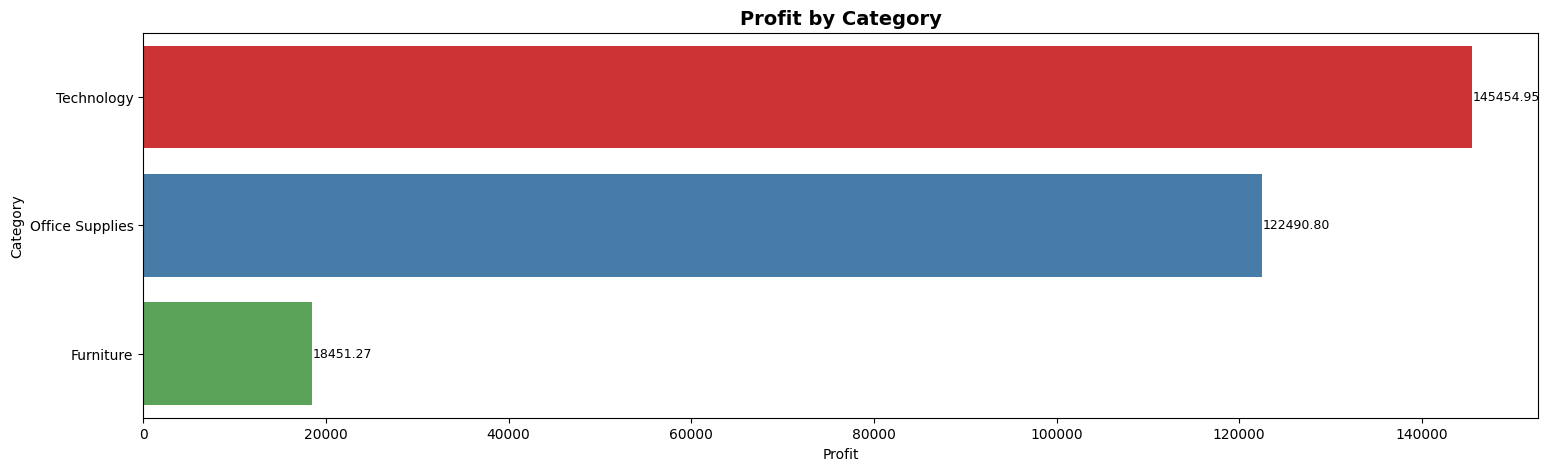

In [143]:
# Plot the sorted data
plt.figure(figsize=(18, 5))
ax = sns.barplot(data=total_profit_by_category,
            x='Profit',
            y='Category',
            hue='Category',
            palette='Set1',
            errorbar=None)

# Add title and labels
plt.title('Profit by Category', fontsize=14, fontweight='bold')
plt.xlabel('Profit', fontsize=10)
plt.ylabel('Category', fontsize=10)

# Add the values to the right of each bar
for p in ax.patches:
    ax.text(p.get_width() + 100, p.get_y() + p.get_height() / 2,
            f'{p.get_width():.2f}', color='black', va='center', ha='left', fontsize=9)

# Display the plot
plt.show()


In [144]:
# Filter data for the Technology category
technology_data = df[df['Category'] == 'Technology']

# Group by 'Product Name'
top_product = technology_data.groupby('Product Name')['Quantity'].sum().reset_index()
top_product = top_product.sort_values(by='Quantity', ascending=False).head(5)
top_product

,Product Name,Quantity
160,Kingston Digital DataTraveler 16GB USB 2.0,57
127,I Need's 3d Hello Kitty Hybrid Silicone Case C...,52
177,Logitech 910-002974 M325 Wireless Mouse for We...,52
180,Logitech Desktop MK120 Mouse and keyboard Combo,50
217,Maxell 4.7GB DVD-R,49


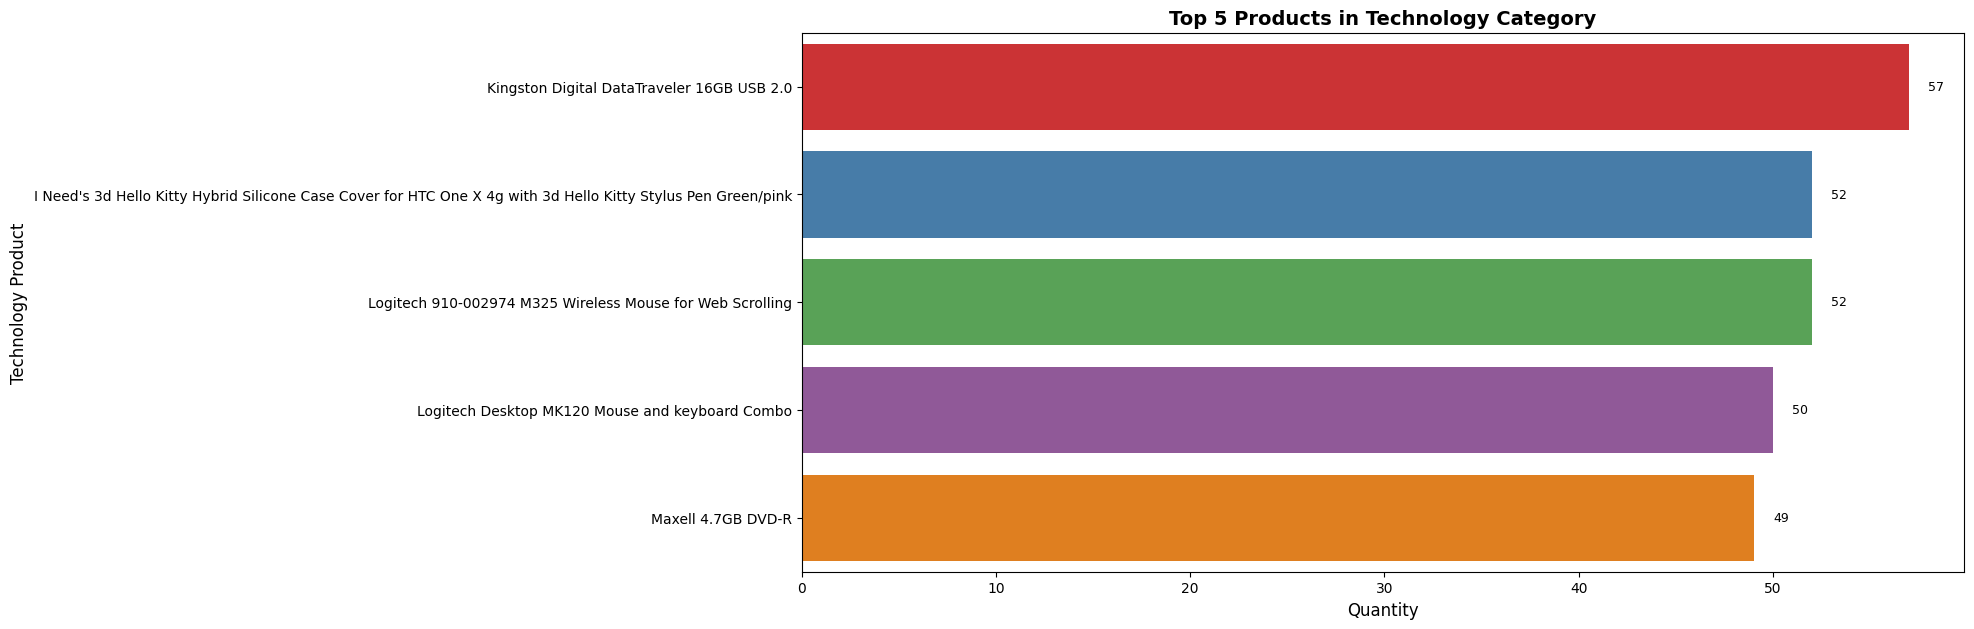

In [145]:
# Plot the top 5 products
plt.figure(figsize=(15, 7))
ax = sns.barplot(data=top_product,
                 x='Quantity',
                 y='Product Name',
                 hue='Product Name',
                 palette='Set1',
                 errorbar=None)

# Add title and labels
plt.title('Top 5 Products in Technology Category', fontsize=14, fontweight='bold')
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Technology Product', fontsize=12)

# Add the values on top of each bar
for p in ax.patches:
    ax.text(p.get_width() + 1, p.get_y() + p.get_height() / 2,
            f'{int(p.get_width())}', color='black', va='center', ha='left', fontsize=9)

# Display the plot
plt.show()


## **Impact of Discounts**

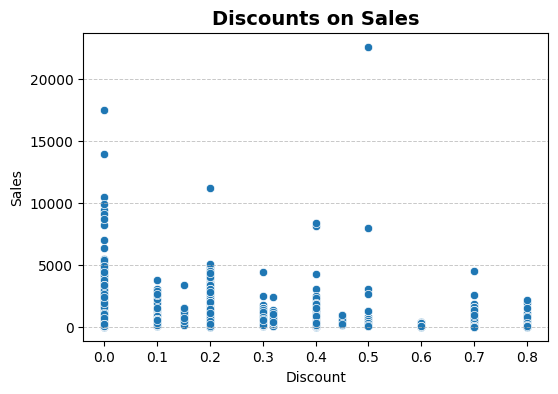

In [146]:
# Discounts on Sales
plt.figure(figsize = (6,4))
sns.scatterplot(x = 'Discount', y = 'Sales', data = df)

# Add title and labels
plt.title('Discounts on Sales', fontsize = 14, fontweight = "bold")
plt.xlabel('Discount', fontsize = 10)
plt.ylabel('Sales', fontsize = 10)

# Add a grid for better readability
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Display the plot
plt.show()

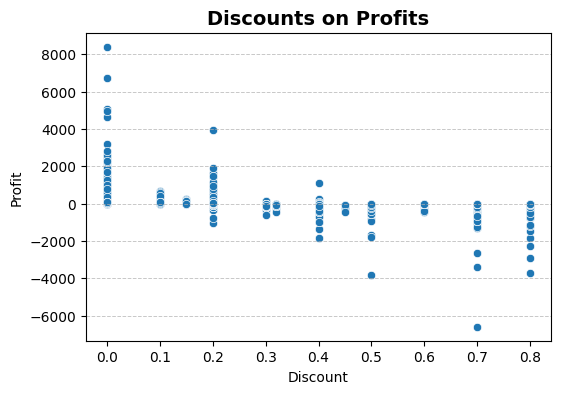

In [147]:
# Discounts of Profits
plt.figure(figsize = (6,4))
sns.scatterplot(x = 'Discount', y = 'Profit', data = df)

# Add title and labels
plt.title('Discounts on Profits', fontsize = 14, fontweight = "bold")
plt.xlabel('Discount', fontsize = 10)
plt.ylabel('Profit', fontsize = 10)

# Add a grid for better readability
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Display the plot
plt.show()

## **Customer**

In [148]:
# Grouping by Segment and Customer to calculate the total number of orders
orders = df.groupby(['Segment', 'Customer ID']).size().reset_index(name='Orders')

# Aggregate orders by Segment
orders_by_segment = orders.groupby('Segment')['Orders'].sum().reset_index()
orders_by_segment

,Segment,Orders
0,Consumer,5191
1,Corporate,3020
2,Home Office,1783


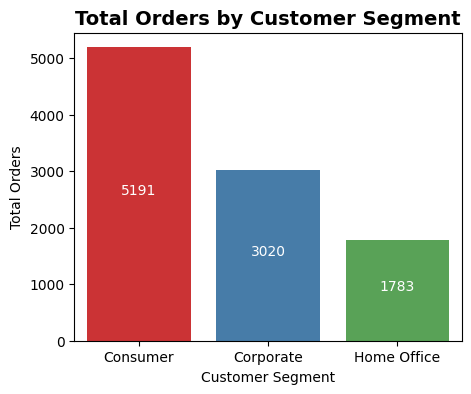

In [149]:
# Plotting Orders by Segment
plt.figure(figsize=(5, 4))
ax = sns.barplot(data=orders_by_segment,
                 x='Segment',
                 y='Orders',
                 hue='Segment',
                 palette='Set1')

# Add title and labels
plt.title('Total Orders by Customer Segment', fontsize=14, fontweight='bold')
plt.xlabel('Customer Segment', fontsize=10)
plt.ylabel('Total Orders', fontsize=10)
plt.xticks(rotation=0)

# Add text inside the bars
for index, row in orders_by_segment.iterrows():
    ax.text(index, row['Orders'] * 0.5, f"{row['Orders']:.0f}", color='white', ha="center", fontsize=10)

# Display the plot
plt.show()


In [150]:
# Group by Customer Name to calculate the total number of orders
orders_by_customer = df.groupby('Customer Name').size().reset_index(name='Total Orders')

# Grouping data by Customer Name to calculate Total Orders, Quantity, Total Payment (Sales), and Segment
most_customers = (
    df.groupby(['Customer Name', 'Segment'])
    .agg({
        'Sales': 'sum',          # Total Payment
        'Quantity': 'sum',       # Total Quantity
        'Order ID': 'count'      # Total Orders
    })
    .reset_index()
    .rename(columns={'Sales': 'Total Payment', 'Order ID': 'Total Orders'})
)

# Sorting by Total Orders to find the Top 5 Customers
most_customers = most_customers.sort_values(by='Total Orders', ascending=False).head(10)

most_customers

,Customer Name,Segment,Total Payment,Quantity,Total Orders
787,William Brown,Consumer,6160.102,146,37
502,Matt Abelman,Home Office,4299.161,117,34
387,John Lee,Consumer,9799.923,143,34
595,Paul Prost,Home Office,7252.608,138,34
249,Edward Hooks,Corporate,10310.880,120,32
145,Chloris Kastensmidt,Consumer,3154.855,122,32
689,Seth Vernon,Consumer,11470.950,109,32
391,Jonathan Doherty,Corporate,7610.864,150,32
791,Zuschuss Carroll,Consumer,8025.707,105,31
60,Arthur Prichep,Consumer,3323.556,102,31


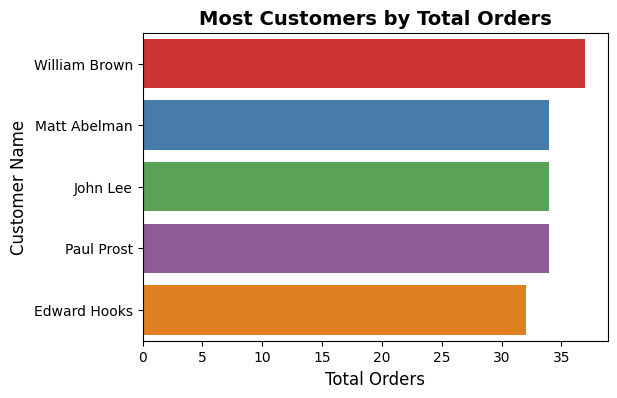

In [151]:
# Plotting the top 5 repeat customers by Customer Name and Total Orders
plt.figure(figsize=(6, 4))
sns.barplot(data=most_customers.head(5),
    x='Total Orders',
    y='Customer Name',
    hue='Customer Name',
    palette='Set1')

# Add title and labels
plt.title('Most Customers by Total Orders', fontsize=14, fontweight='bold')
plt.xlabel('Total Orders', fontsize=12)
plt.ylabel('Customer Name', fontsize=12)

# Display the plot
plt.show()


## **Shipping**

In [170]:
# Calculate the shipping duration in days
df['Shipping Duration'] = (df['Ship Date'] - df['Order Date']).dt.days

# Format the Shipping Duration to show "days"
df['Shipping Duration'] = df['Shipping Duration'].apply(lambda x: f"{x} days" if pd.notnull(x) else "N/A")

# Display the first few rows with the new 'Shipping Duration' column
df[['Order Date', 'Ship Date', 'Ship Mode', 'Shipping Duration']].head()

,Order Date,Ship Date,Ship Mode,Shipping Duration
0,2016-11-08,2016-11-11,Second Class,3 days
1,2016-11-08,2016-11-11,Second Class,3 days
2,2016-06-12,2016-06-16,Second Class,4 days
3,2015-10-11,2015-10-18,Standard Class,7 days
4,2015-10-11,2015-10-18,Standard Class,7 days


In [171]:
# Convert 'Shipping Duration' to numeric by extracting the number of days
df['Shipping Duration'] = df['Shipping Duration'].str.extract(r'(\d+)').astype(int)

# Calculate the average shipping duration per shipping mode
average_shipping_duration = df.groupby('Ship Mode')['Shipping Duration'].mean().reset_index()
average_shipping_duration = average_shipping_duration.sort_values(by='Shipping Duration', ascending=True)
average_shipping_duration


,Ship Mode,Shipping Duration
1,Same Day,0.044199
0,First Class,2.182705
2,Second Class,3.238046
3,Standard Class,5.006535


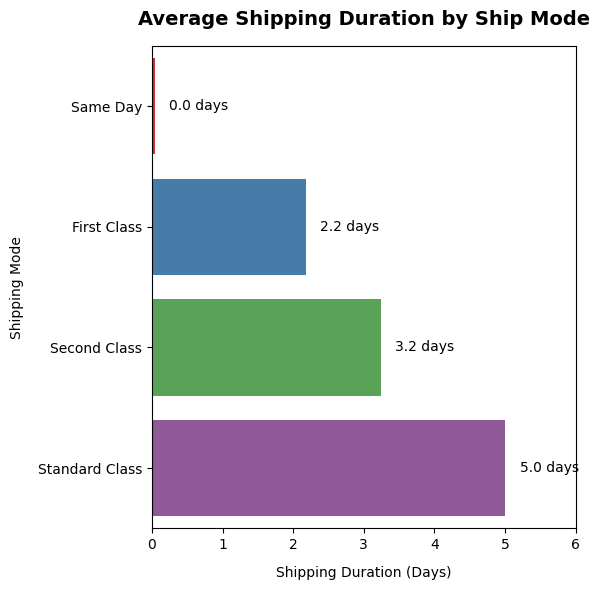

In [172]:
# Create the horizontal bar chart and assign it to a variable
plt.figure(figsize=(6, 6))
ax = sns.barplot(
    data=average_shipping_duration,
    y='Ship Mode',
    x='Shipping Duration',
    hue='Ship Mode',  # Assign 'Ship Mode' to 'hue' to avoid FutureWarning
    palette='Set1',
    orient='h',
    legend=False  # This removes the legend (optional, based on your preference)
)

# Add title and labels
plt.title('Average Shipping Duration by Ship Mode', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Shipping Duration (Days)', fontsize=10, labelpad=10)
plt.ylabel('Shipping Mode', fontsize=10, labelpad=10)

# Add text labels at the end of each bar
for bar, row in zip(ax.patches, average_shipping_duration.itertuples()):
    shipping_duration = row[2]  # This will access the 'Shipping Duration' column safely by index
    plt.text(
        x=bar.get_width() + 0.2,
        y=bar.get_y() + bar.get_height() / 2,
        s=f"{shipping_duration:.1f} days",  # Access the Shipping Duration directly
        va='center',
        fontsize=10,
        color='black'
    )

# Adjust x-axis limits if needed
plt.xlim(0, average_shipping_duration['Shipping Duration'].max() + 1)

# Display the plot
plt.tight_layout()
plt.show()


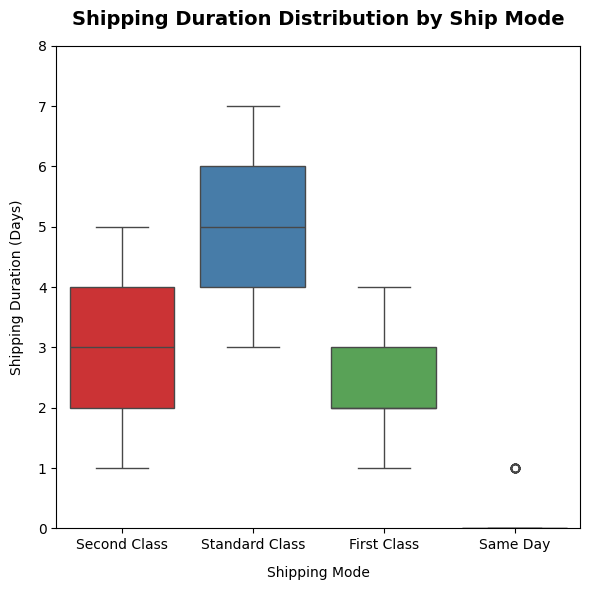

In [173]:
# Plot using Boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(data=df, x='Ship Mode', y='Shipping Duration', hue='Ship Mode', palette='Set1')

# Add title and labels
plt.title('Shipping Duration Distribution by Ship Mode', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Shipping Mode', fontsize=10, labelpad=10)
plt.ylabel('Shipping Duration (Days)', fontsize=10, labelpad=10)

# Adjust y-axis limits if needed
plt.ylim(0, df['Shipping Duration'].max() + 1)

# Display the plot
plt.tight_layout()
plt.show()


In [174]:
# Count the total orders per Ship Mode
total_orders_by_ship_mode = df['Ship Mode'].value_counts().reset_index()
total_orders_by_ship_mode.columns = ['Ship Mode', 'Total Orders']
total_orders_by_ship_mode

,Ship Mode,Total Orders
0,Standard Class,5968
1,Second Class,1945
2,First Class,1538
3,Same Day,543


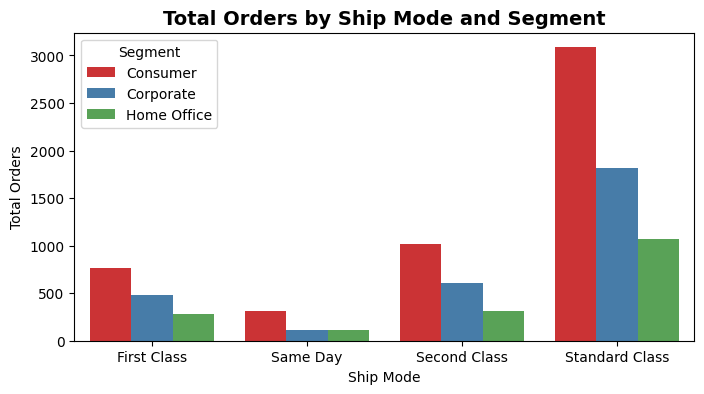

In [176]:
# Group by Ship Mode and Segment, and calculate the total number of orders for each combination
total_orders_by_shipmode_segment = df.groupby(['Ship Mode', 'Segment'])['Order ID'].count().reset_index(name='Total Orders')

# Plotting the total number of orders per Ship Mode and Segment (Bar Plot)
plt.figure(figsize=(8, 4))
sns.barplot(data=total_orders_by_shipmode_segment,
            x='Ship Mode',
            y='Total Orders',
            hue='Segment',
            palette='Set1')

# Add title and labels
plt.title('Total Orders by Ship Mode and Segment', fontsize=14, fontweight='bold')
plt.xlabel('Ship Mode', fontsize=10)
plt.ylabel('Total Orders', fontsize=10)

# Display the plot
plt.show()
